## Spotify project

# Spotify Top 50 Tracks of 2020 - Data Analysis

## Introduction
This analysis will explore the top 50 most popular songs on Spotify in 2020 and will examine different aspects of these songs, such as:
* The most popular genres, artists and albums.
* Audio features such as danceability, loudness, and acousticness.
* Correlations between song attributes.
* Differences between Pop, Hip-Hop, Dance/Electronic, and Alternative/Indie.

The purpose of this analysis is to uncover patterns in popular music and understand what makes a song a hit.


### Data Loading & Cleaning

Before conducting analysis it is paramount to ensure that dataset is clean and reliable.  
This involves:
1. **Handling missing values** – Ensuring there is no incomplete records.
2. **Removing duplicate samples** – Avoiding repeated entries that could skew results.
3. **Treating outliers** – Identifying extreme values that might distort analysis.

By performing these steps, there is a certainty that the dataset will accurately represent the information.


*Data loading and examination of the structure of the dataset*:

In [184]:
# Importing neccessary libraries
import pandas as pd
import numpy as np

In [185]:
# Uploading data
tracks = pd.read_csv("spotifytoptracks.csv")

In [186]:
# First 5 rows of uploaded data
tracks.head()

Unnamed: 0       artist                                  album  \
0           0   The Weeknd                            After Hours   
1           1  Tones And I                           Dance Monkey   
2           2  Roddy Ricch  Please Excuse Me For Being Antisocial   
3           3    SAINt JHN                  Roses (Imanbek Remix)   
4           4     Dua Lipa                       Future Nostalgia   

              track_name                track_id  energy  danceability  key  \
0        Blinding Lights  0VjIjW4GlUZAMYd2vXMi3b   0.730         0.514    1   
1           Dance Monkey  1rgnBhdG2JDFTbYkYRZAku   0.593         0.825    6   
2                The Box  0nbXyq5TXYPCO7pr3N8S4I   0.586         0.896   10   
3  Roses - Imanbek Remix  2Wo6QQD1KMDWeFkkjLqwx5   0.721         0.785    8   
4        Don't Start Now  3PfIrDoz19wz7qK7tYeu62   0.793         0.793   11   

   loudness  acousticness  speechiness  instrumentalness  liveness  valence  \
0    -5.934       0.00146       0.0598          0.000095    0.0897    0.334   
1    -6.401       0.68800       0.0988          0.000161    0.1700    0.540   
2    -6.687       0.10400       0.0559          0.000000    0.7900    0.642   
3    -5.457       0.01490       0.0506          0.004320    0.2850    0.894   
4    -4.521       0.01230       0.0830          0.000000    0.0951    0.679   

     tempo  duration_ms              genre  
0  171.005       200040           R&B/Soul  
1   98.078       209755  Alternative/Indie  
2  116.971       196653        Hip-Hop/Rap  
3  121.962       176219   Dance/Electronic  
4  123.950       183290           Nu-disco

In [187]:
# Last 5 rows of uploaded data
tracks.tail()

Unnamed: 0         artist                                           album  \
45          45     Juice WRLD                         Goodbye & Good Riddance   
46          46  Ariana Grande                                    Stuck with U   
47          47        JP Saxe  If the World Was Ending (feat. Julia Michaels)   
48          48       Dua Lipa                                Future Nostalgia   
49          49   Travis Scott                                      ASTROWORLD   

                                        track_name                track_id  \
45                                    Lucid Dreams  285pBltuF7vW8TeWk8hdRR   
46               Stuck with U (with Justin Bieber)  4HBZA5flZLE435QTztThqH   
47  If the World Was Ending - feat. Julia Michaels  2kJwzbxV2ppxnQoYw4GLBZ   
48                                        Physical  3AzjcOeAmA57TIOr9zF1ZW   
49                                      SICKO MODE  2xLMifQCjDGFmkHkpNLD9h   

    energy  danceability  key  loudness  acousticness  speechiness  \
45   0.566         0.511    6    -7.230       0.34900       0.2000   
46   0.450         0.597    8    -6.658       0.22300       0.0418   
47   0.473         0.464    1   -10.086       0.86600       0.1290   
48   0.844         0.647    0    -3.756       0.01370       0.0457   
49   0.730         0.834    8    -3.714       0.00513       0.2220   

    instrumentalness  liveness  valence    tempo  duration_ms  \
45          0.000000     0.340    0.218   83.903       239836   
46          0.000000     0.382    0.537  178.765       228482   
47          0.000000     0.109    0.604   75.801       208687   
48          0.000658     0.102    0.746  146.967       193829   
49          0.000000     0.124    0.446  155.008       312820   

               genre  
45               Pop  
46               Pop  
47               Pop  
48  Dance/Electronic  
49       Hip-Hop/Rap

In [188]:
# Details about each feature, non_null variables, memory usage
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   artist            50 non-null     object 
 2   album             50 non-null     object 
 3   track_name        50 non-null     object 
 4   track_id          50 non-null     object 
 5   energy            50 non-null     float64
 6   danceability      50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   acousticness      50 non-null     float64
 10  speechiness       50 non-null     float64
 11  instrumentalness  50 non-null     float64
 12  liveness          50 non-null     float64
 13  valence           50 non-null     float64
 14  tempo             50 non-null     float64
 15  duration_ms       50 non-null     int64  
 16  genre             50 non-null     object 
dtyp

In [189]:
# Shape of a dataset: number of rows and columns
print("Dataset shape:", tracks.shape)

Dataset shape: (50, 17)


In [190]:
# Names of columns
tracks.columns.tolist()

['Unnamed: 0',
 'artist',
 'album',
 'track_name',
 'track_id',
 'energy',
 'danceability',
 'key',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'genre']

In [191]:
# Names of rows
tracks.index

RangeIndex(start=0, stop=50, step=1)

*Identifying and handling Nan values to clean data and prepare it for the analysis:*

In [192]:
# Handling Nan figures
tracks.isnull().any()

Unnamed: 0          False
artist              False
album               False
track_name          False
track_id            False
energy              False
danceability        False
key                 False
loudness            False
acousticness        False
speechiness         False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
genre               False
dtype: bool

In [193]:
# Ensuring that there are not any Nan values left
tracks.dropna(inplace=True)

*Checking and removing duplicates and not crucial features for the purpose of avoiding misleading statistics and enchancing data consistency:*

In [194]:
print("Duplicate rows before removal:", tracks.duplicated().sum())

Duplicate rows before removal: 0


In [195]:
# Removing dulpicates
tracks = tracks.drop_duplicates()

In [196]:
print("Duplicated rows after removal:", tracks.duplicated().sum())

Duplicated rows after removal: 0


In [197]:
# Removing unnecessary feature
tracks.pop("Unnamed: 0")

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
Name: Unnamed: 0, dtype: int64

In [198]:
# Ensureing that "Unnamed: 0" got eliminated
tracks.head()

artist                                  album             track_name  \
0   The Weeknd                            After Hours        Blinding Lights   
1  Tones And I                           Dance Monkey           Dance Monkey   
2  Roddy Ricch  Please Excuse Me For Being Antisocial                The Box   
3    SAINt JHN                  Roses (Imanbek Remix)  Roses - Imanbek Remix   
4     Dua Lipa                       Future Nostalgia        Don't Start Now   

                 track_id  energy  danceability  key  loudness  acousticness  \
0  0VjIjW4GlUZAMYd2vXMi3b   0.730         0.514    1    -5.934       0.00146   
1  1rgnBhdG2JDFTbYkYRZAku   0.593         0.825    6    -6.401       0.68800   
2  0nbXyq5TXYPCO7pr3N8S4I   0.586         0.896   10    -6.687       0.10400   
3  2Wo6QQD1KMDWeFkkjLqwx5   0.721         0.785    8    -5.457       0.01490   
4  3PfIrDoz19wz7qK7tYeu62   0.793         0.793   11    -4.521       0.01230   

   speechiness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.0598          0.000095    0.0897    0.334  171.005       200040   
1       0.0988          0.000161    0.1700    0.540   98.078       209755   
2       0.0559          0.000000    0.7900    0.642  116.971       196653   
3       0.0506          0.004320    0.2850    0.894  121.962       176219   
4       0.0830          0.000000    0.0951    0.679  123.950       183290   

               genre  
0           R&B/Soul  
1  Alternative/Indie  
2        Hip-Hop/Rap  
3   Dance/Electronic  
4           Nu-disco

*Filtering and treating outliers to prevent distortion of the summary statistics and improve data interpretation:*

In [199]:
# Treating outliers
def treat_outliers():
    updated_tracks = tracks.copy()  # Create a copy of tracks

    # Iterating through each numerical feature while detecting the outliers
    for col in updated_tracks.select_dtypes(include=np.number).columns:

        # Calculating the spread of 50% of given data
        Q1 = updated_tracks[col].quantile(0.25)
        Q3 = updated_tracks[col].quantile(0.75)
        IQR = Q3 - Q1

        # Discovering the threshholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replacing extreme values with median measures
        median_value = updated_tracks[col].median()
        updated_tracks[col] = np.where(
            (updated_tracks[col] < lower_bound) | (updated_tracks[col] > upper_bound),
            median_value,
            updated_tracks[col],
        )

    return updated_tracks

In [200]:
# Updating the data
updated_tracks = treat_outliers()
updated_tracks

artist                                              album  \
0        The Weeknd                                        After Hours   
1       Tones And I                                       Dance Monkey   
2       Roddy Ricch              Please Excuse Me For Being Antisocial   
3         SAINt JHN                              Roses (Imanbek Remix)   
4          Dua Lipa                                   Future Nostalgia   
5            DaBaby                                   BLAME IT ON BABY   
6      Harry Styles                                          Fine Line   
7             Powfu                   death bed (coffee for your head)   
8     Trevor Daniel                                           Nicotine   
9     Lewis Capaldi            Divinely Uninspired To A Hellish Extent   
10          KAROL G                                               Tusa   
11   Arizona Zervas                                            ROXANNE   
12      Post Malone                               Hollywood's Bleeding   
13        Lil Mosey                                 Certified Hitmaker   
14    Justin Bieber                                            Changes   
15            Drake                               Dark Lane Demo Tapes   
16    Lewis Capaldi  Divinely Uninspired To A Hellish Extent (Exten...   
17         Doja Cat                                           Hot Pink   
18         Maroon 5                                           Memories   
19           Future                                      High Off Life   
20        Jawsh 685                   Savage Love (Laxed - Siren Beat)   
21     Harry Styles                                          Fine Line   
22            Topic                                        Breaking Me   
23         24kGoldn                             Mood (feat. iann dior)   
24    Billie Eilish                                everything i wanted   
25     Shawn Mendes                              Shawn Mendes (Deluxe)   
26    Billie Eilish           WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?   
27          Cardi B                    WAP (feat. Megan Thee Stallion)   
28         Surfaces                                 Where the Light Is   
29           Eminem                            Music To Be Murdered By   
30    Justin Bieber                                            Changes   
31         Dua Lipa                                   Future Nostalgia   
32              BTS                         Dynamite (DayTime Version)   
33            BENEE                                            Hey u x   
34        Surf Mesa               ily (i love you baby) (feat. Emilee)   
35        Lady Gaga                                         Chromatica   
36     Travis Scott                                HIGHEST IN THE ROOM   
37      Post Malone                               Hollywood's Bleeding   
38           Maluma                                       PAPI JUANCHO   
39           Regard                                            Ride It   
40     Travis Scott                    Birds In The Trap Sing McKnight   
41  Black Eyed Peas                                        Translation   
42       THE SCOTTS                                         THE SCOTTS   
43        Bad Bunny                                           YHLQMDLG   
44    Billie Eilish                               lovely (with Khalid)   
45       Juice WRLD                            Goodbye & Good Riddance   
46    Ariana Grande                                       Stuck with U   
47          JP Saxe     If the World Was Ending (feat. Julia Michaels)   
48         Dua Lipa                                   Future Nostalgia   
49     Travis Scott                                         ASTROWORLD   

                                        track_name                track_id  \
0                                  Blinding Lights  0VjIjW4GlUZAMYd2vXMi3b   
1                                     Dance Monkey  1rgnBhdG2JDFTbYkYRZAku   
2   

### Understanding the Dataset

Gain insight into the structure and key factors of data:
- The **number of observations (rows) and features (columns).**
- The **features that are categorical** (e.g., genre, artist).
- The **features that are numerical** (e.g., danceability, loudness).

This will help to determine the type of analysis it is possible perform on the allocated data.


In [201]:
# Number of observations
print("Number of observations:", tracks.size)

Number of observations: 800


In [202]:
# Number of features
print("Number of features:", len(tracks.columns))

Number of features: 16


In [203]:
# Presented informations allows to recognize numerical and categorical features
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usag

In [204]:
# Categorical features
print(
    "Categorical features: ",
    list(tracks.select_dtypes(include="object").columns),
)

Categorical features:  ['artist', 'album', 'track_name', 'track_id', 'genre']


In [205]:
# Numerical features
print(
    "Numerical features: ", list(tracks.select_dtypes(include="number").columns)
)

Numerical features:  ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


### Most Popular Artists

Inspection of:
- **Artists who have more than one track in the top 50.**  
- **The most popular artist overall.**  
- **The total number of unique artists featured in the top 50.**  

This will assist in evaluating which artists dominated Spotify charts in 2020.


In [206]:
# Artists that have more than one popular track
filtered_artists = tracks.artist.value_counts()
filtered_artists = filtered_artists[filtered_artists > 1]
filtered_artists

artist
Dua Lipa         3
Billie Eilish    3
Travis Scott     3
Harry Styles     2
Lewis Capaldi    2
Justin Bieber    2
Post Malone      2
Name: count, dtype: int64

<Axes: xlabel='artist'>

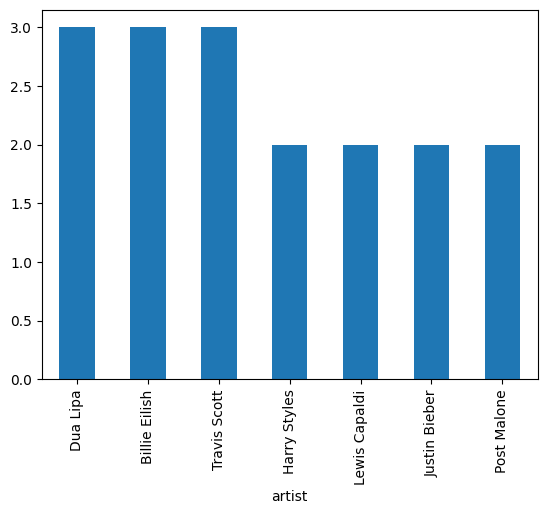

In [207]:
# Simulation of artists that have more than one popular track
filtered_artists.plot.bar()

In [208]:
# The most popular artists
max_track_numbers = tracks["artist"].value_counts().max()
the_most_popular_artist = tracks["artist"].value_counts()
the_most_popular_artist= the_most_popular_artist[the_most_popular_artist == max_track_numbers]
print("The most popular artists:", the_most_popular_artist.index.tolist())

The most popular artists: ['Dua Lipa', 'Billie Eilish', 'Travis Scott']


In [209]:
# Number of artists in total
number_of_artists = tracks.artist.nunique()
print("Total number of artists:", number_of_artists)

Total number of artists: 40


### Most Popular Albums

Some albums might have multiple songs in the top 50. 
Evaluation to:
- Identify **albums with more than one song.**
- Count **the total number of unique albums** in the dataset.

This will clarify whether certain albums had a strong influence on the music charts.


In [210]:
# Albums that have more than one popular track
filtered_albums = tracks["album"].value_counts()
filtered_albums[filtered_albums > 1]

album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64

<Axes: xlabel='album'>

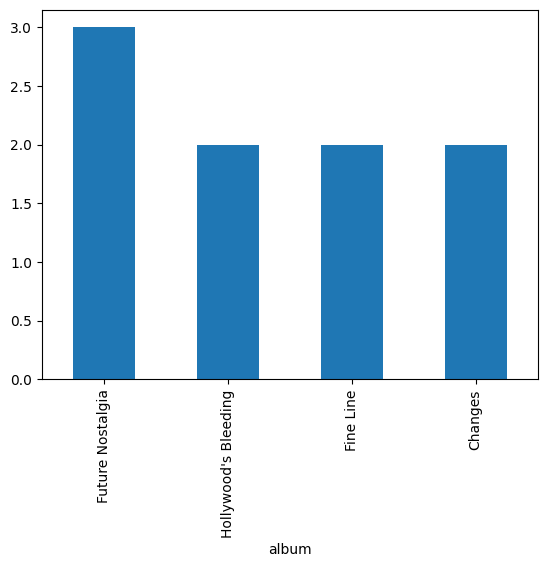

In [211]:
# Modeling of albums that have more than one popular track
filtered_albums[filtered_albums > 1].plot.bar()

In [212]:
# Number of albums in total
albums_total = tracks.album.nunique()
print("Number of albums in total:", albums_total)

Number of albums in total: 45


### Danceability Analysis

Danceability is a metric (ranging from 0 to 1) that represents how suitable a song is for dancing.  

- **Tracks with danceability above 0.7** → These are highly danceable songs, typically found in pop, EDM, or club music.  
- **Tracks with danceability below 0.4** → These are less danceable, possibly more acoustic or ballads.  

By interpreting these aspects it's more clear whether danceable songs dominate the top 50 or if there’s diversity in song styles.



In [213]:
# Tracks with danceability > 0.7
tracks_dance = tracks[tracks["danceability"] > 0.7][
    ["artist", "track_name", "danceability"]
]
tracks_dance

artist                                     track_name  \
1       Tones And I                                   Dance Monkey   
2       Roddy Ricch                                        The Box   
3         SAINt JHN                          Roses - Imanbek Remix   
4          Dua Lipa                                Don't Start Now   
5            DaBaby                   ROCKSTAR (feat. Roddy Ricch)   
7             Powfu               death bed (coffee for your head)   
8     Trevor Daniel                                        Falling   
10          KAROL G                                           Tusa   
13        Lil Mosey                                Blueberry Faygo   
14    Justin Bieber                       Intentions (feat. Quavo)   
15            Drake                                   Toosie Slide   
17         Doja Cat                                         Say So   
18         Maroon 5                                       Memories   
19           Future                     Life Is Good (feat. Drake)   
20        Jawsh 685               Savage Love (Laxed - Siren Beat)   
22            Topic                                    Breaking Me   
24    Billie Eilish                            everything i wanted   
25     Shawn Mendes                                       Señorita   
26    Billie Eilish                                        bad guy   
27          Cardi B                WAP (feat. Megan Thee Stallion)   
28         Surfaces                                    Sunday Best   
29           Eminem                    Godzilla (feat. Juice WRLD)   
31         Dua Lipa                                 Break My Heart   
32              BTS                                       Dynamite   
33            BENEE               Supalonely (feat. Gus Dapperton)   
37      Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   
38           Maluma                                          Hawái   
39           Regard                                        Ride It   
40     Travis Scott                                     goosebumps   
41  Black Eyed Peas                      RITMO (Bad Boys For Life)   
42       THE SCOTTS                                     THE SCOTTS   
49     Travis Scott                                     SICKO MODE   

    danceability  
1          0.825  
2          0.896  
3          0.785  
4          0.793  
5          0.746  
7          0.726  
8          0.784  
10         0.803  
13         0.774  
14         0.806  
15         0.830  
17         0.787  
18         0.764  
19         0.795  
20         0.767  
22         0.789  
24         0.704  
25         0.759  
26         0.701  
27         0.935  
28         0.878  
29         0.808  
31         0.730  
32         0.746  
33         0.862  
37         0.755  
38         0.783  
39         0.880  
40         0.841  
41         0.723  
42         0.716  
49         0.834

<Axes: >

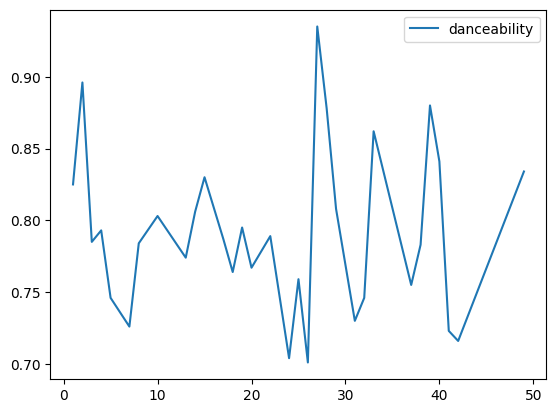

In [214]:
# Rendering of hits with danceability > 0.7
tracks_dance.plot()

In [215]:
# Songs with danceability below 0.4
tracks.query("danceability < 0.4")[["artist", "track_name", "danceability"]]
print("None tracks are found with danceability below 0.4")

None tracks are found with danceability below 0.4


### Loudness Analysis

Loudness, measured in decibels (dB), indicates how "loud" a song is. A higher value means the track is louder, while a lower value means it is quieter.  

- **Tracks with loudness above -5 dB** → These are the loudest songs in the top 50.  
- **Tracks with loudness below -8 dB** → These are quieter songs, possibly more acoustic or softer in production.  

This analysis assist in gaining clarity whether louder songs tend to be more popular and if softer tracks also make it to the top.


In [216]:
# Tracks with loudness above -5
tracks_loud_above = tracks.loc[tracks["loudness"] > -5][
    ["artist", "track_name", "loudness"]
].reset_index(drop=True)
tracks_loud_above

artist                                     track_name  loudness
0        Dua Lipa                                Don't Start Now    -4.521
1    Harry Styles                               Watermelon Sugar    -4.209
2         KAROL G                                           Tusa    -3.280
3     Post Malone                                        Circles    -3.497
4   Lewis Capaldi                                  Before You Go    -4.858
5        Doja Cat                                         Say So    -4.577
6    Harry Styles                                      Adore You    -3.675
7        24kGoldn                         Mood (feat. iann dior)    -3.558
8        Dua Lipa                                 Break My Heart    -3.434
9             BTS                                       Dynamite    -4.410
10          BENEE               Supalonely (feat. Gus Dapperton)    -4.746
11      Lady Gaga                Rain On Me (with Ariana Grande)    -3.764
12    Post Malone  Sunflower - Spider-Man: Into the Spider-Verse    -4.368
13         Maluma                                          Hawái    -3.454
14         Regard                                        Ride It    -4.258
15   Travis Scott                                     goosebumps    -3.370
16      Bad Bunny                                        Safaera    -4.074
17       Dua Lipa                                       Physical    -3.756
18   Travis Scott                                     SICKO MODE    -3.714

<Axes: >

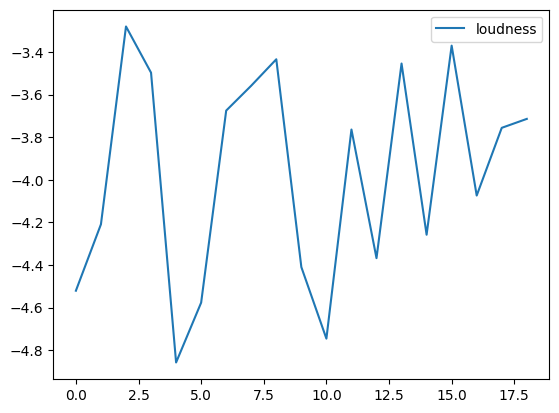

In [217]:
# Data projection of hits with loudness above -5
tracks_loud_above.plot()

In [218]:
# Tracks with loudness below -8
track_loud_below = tracks.query("loudness < -8")[["artist", "loudness"]]
track_loud_below

artist  loudness
7           Powfu    -8.765
8   Trevor Daniel    -8.756
15          Drake    -8.820
20      Jawsh 685    -8.520
24  Billie Eilish   -14.454
26  Billie Eilish   -10.965
36   Travis Scott    -8.764
44  Billie Eilish   -10.109
47        JP Saxe   -10.086

<Axes: >

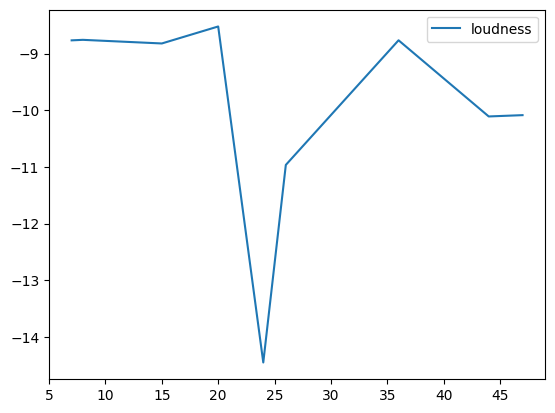

In [219]:
# Visualisation of songs with loudness below -8
track_loud_below.plot()

### Longest & Shortest Songs

This evaluation will determine:
- **The longest song in the top 50.**
- **The shortest song in the top 50.**

This will uncover if song length has any impact on popularity.


In [220]:
# Longest track
artist, track_name, duration_ms = tracks.loc[
    tracks["duration_ms"].idxmax(), ["artist", "track_name", "duration_ms"]
]
print(
    f"Longest track's author: {artist}\nTrack's name: {track_name}\nTrack's duration: {(duration_ms/60000):.2f} min"
)

Longest track's author: Travis Scott
Track's name: SICKO MODE
Track's duration: 5.21 min


In [221]:
# Shortest hit
artist, track_name, duration_ms = tracks.query("duration_ms.idxmin()")[
    ["artist", "track_name", "duration_ms"]
]
print(
    f"Shortest track's author: {artist}\nTrack's name: {track_name}\nTrack's duration: {(duration_ms/60000):.2f} min"
)

Shortest track's author: 24kGoldn
Track's name: Mood (feat. iann dior)
Track's duration: 2.34 min


### Most Popular Genre

To perform a deeper investigation:
- Count the number of genres.
- Identify which genre appears the most.
- Find genres that have **only one** song in the top 50.

This method will highlight which music styles were most dominant in 2020.


In [222]:
# The most popular genre
hit_genre = tracks.genre.value_counts().idxmax()
print("The most popular genre is", hit_genre)

The most popular genre is Pop


In [223]:
# Genres that have one song
one_track_genre = tracks["genre"].value_counts()
one_track_genre[one_track_genre == 1].index.tolist()

['R&B/Hip-Hop alternative',
 'Nu-disco',
 'Pop/Soft Rock',
 'Pop rap',
 'Hip-Hop/Trap',
 'Dance-pop/Disco',
 'Disco-pop',
 'Dreampop/Hip-Hop/R&B',
 'Alternative/reggaeton/experimental',
 'Chamber pop']

In [224]:
# Number of genres in total
print("Number of genres in total:", tracks.genre.nunique())

Number of genres in total: 16


### Correlation Between Song Features

By analyzing correlations between different musical attributes, it is easier to comprehend how they interact. 
 
By identifying:
- **Strong positive correlations** (features that increase together).
- **Strong negative correlations** (features that move in opposite directions).
- **Uncorrelated features** (independent attributes).

This will aid in estabilishing which characteristics are most influential in defining a hit song.


In [225]:
# Compute correlation matrix while working only with numerical figures
numerical_values = tracks.select_dtypes(include=["number"])
corr_matrix = numerical_values.corr()

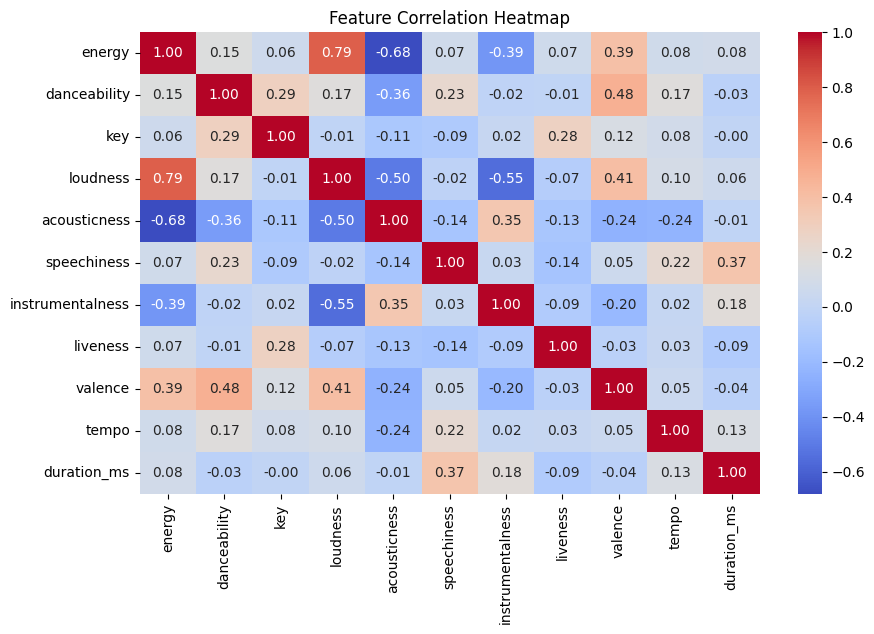

In [226]:
# Visualisation of features correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<Axes: >

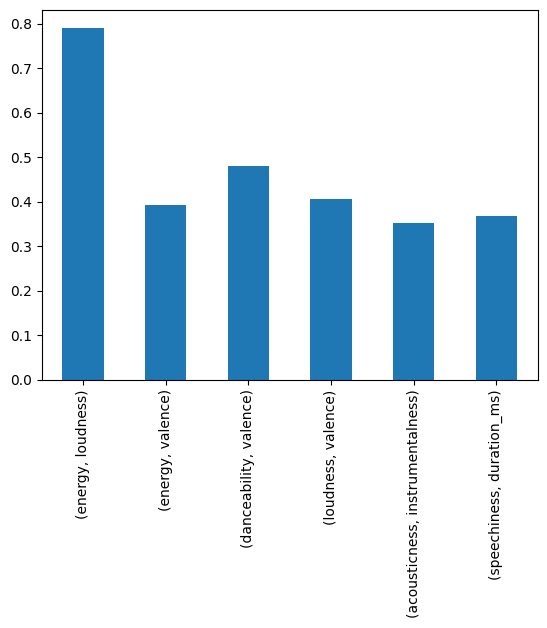

In [227]:
# Rendering of positive correlation figures
pos_corr = corr_matrix[(corr_matrix > 0.3) & (corr_matrix < 1)].stack().drop_duplicates()
pos_corr.plot.bar()

<Axes: >

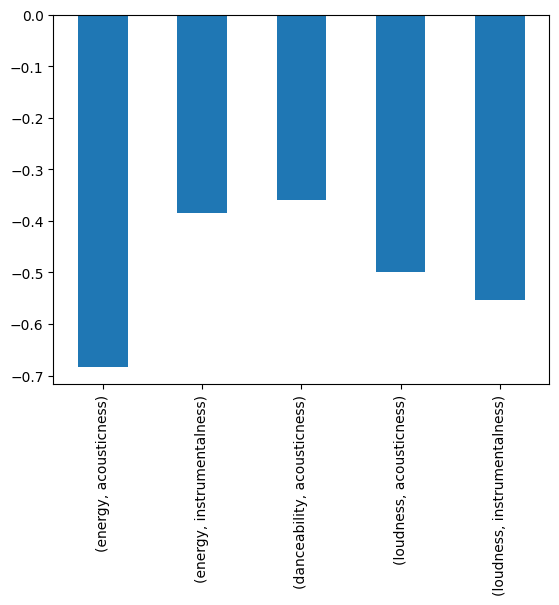

In [228]:
# Simulation of negative correlation quantities
neg_corr = corr_matrix[(corr_matrix < -0.3) & (corr_matrix > -1)].stack().drop_duplicates()
neg_corr.plot.bar()

*Strong negattive and positive correlations*

In [229]:
# Filter strong positive correlation (above 0.7 and below 1 which is a perfect positive correlation)
strong_positive_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)]
strong_positive_corr

energy  danceability  key  loudness  acousticness  \
energy                NaN           NaN  NaN   0.79164           NaN   
danceability          NaN           NaN  NaN       NaN           NaN   
key                   NaN           NaN  NaN       NaN           NaN   
loudness          0.79164           NaN  NaN       NaN           NaN   
acousticness          NaN           NaN  NaN       NaN           NaN   
speechiness           NaN           NaN  NaN       NaN           NaN   
instrumentalness      NaN           NaN  NaN       NaN           NaN   
liveness              NaN           NaN  NaN       NaN           NaN   
valence               NaN           NaN  NaN       NaN           NaN   
tempo                 NaN           NaN  NaN       NaN           NaN   
duration_ms           NaN           NaN  NaN       NaN           NaN   

                  speechiness  instrumentalness  liveness  valence  tempo  \
energy                    NaN               NaN       NaN      NaN    NaN   
danceability              NaN               NaN       NaN      NaN    NaN   
key                       NaN               NaN       NaN      NaN    NaN   
loudness                  NaN               NaN       NaN      NaN    NaN   
acousticness              NaN               NaN       NaN      NaN    NaN   
speechiness               NaN               NaN       NaN      NaN    NaN   
instrumentalness          NaN               NaN       NaN      NaN    NaN   
liveness                  NaN               NaN       NaN      NaN    NaN   
valence                   NaN               NaN       NaN      NaN    NaN   
tempo                     NaN               NaN       NaN      NaN    NaN   
duration_ms               NaN               NaN       NaN      NaN    NaN   

                  duration_ms  
energy                    NaN  
danceability              NaN  
key                       NaN  
loudness                  NaN  
acousticness              NaN  
speechiness               NaN  
instrumentalness          NaN  
liveness                  NaN  
valence                   NaN  
tempo                     NaN  
duration_ms               NaN

In [230]:
# Extract only strong positive correlations (without NaN)
strong_pos_corr_pairs = corr_matrix.stack()
strong_pos_corr_pairs = strong_pos_corr_pairs[
    (strong_pos_corr_pairs > 0.7) & (strong_pos_corr_pairs < 1)
]
strong_pos_corr_pairs.drop_duplicates()

energy  loudness    0.79164
dtype: float64

In [231]:
# Filter strongly negative correlation (less than -0.7 and above -1 which is a perfect negative correlation)
strong_negative_corr = corr_matrix[(corr_matrix < -0.7) & (corr_matrix > -1)]
strong_negative_corr

energy  danceability  key  loudness  acousticness  \
energy               NaN           NaN  NaN       NaN           NaN   
danceability         NaN           NaN  NaN       NaN           NaN   
key                  NaN           NaN  NaN       NaN           NaN   
loudness             NaN           NaN  NaN       NaN           NaN   
acousticness         NaN           NaN  NaN       NaN           NaN   
speechiness          NaN           NaN  NaN       NaN           NaN   
instrumentalness     NaN           NaN  NaN       NaN           NaN   
liveness             NaN           NaN  NaN       NaN           NaN   
valence              NaN           NaN  NaN       NaN           NaN   
tempo                NaN           NaN  NaN       NaN           NaN   
duration_ms          NaN           NaN  NaN       NaN           NaN   

                  speechiness  instrumentalness  liveness  valence  tempo  \
energy                    NaN               NaN       NaN      NaN    NaN   
danceability              NaN               NaN       NaN      NaN    NaN   
key                       NaN               NaN       NaN      NaN    NaN   
loudness                  NaN               NaN       NaN      NaN    NaN   
acousticness              NaN               NaN       NaN      NaN    NaN   
speechiness               NaN               NaN       NaN      NaN    NaN   
instrumentalness          NaN               NaN       NaN      NaN    NaN   
liveness                  NaN               NaN       NaN      NaN    NaN   
valence                   NaN               NaN       NaN      NaN    NaN   
tempo                     NaN               NaN       NaN      NaN    NaN   
duration_ms               NaN               NaN       NaN      NaN    NaN   

                  duration_ms  
energy                    NaN  
danceability              NaN  
key                       NaN  
loudness                  NaN  
acousticness              NaN  
speechiness               NaN  
instrumentalness          NaN  
liveness                  NaN  
valence                   NaN  
tempo                     NaN  
duration_ms               NaN

In [232]:
# Extract only strong negative correlations(without Nan)
strong_neg_corr_pairs = corr_matrix.stack()
strong_neg_corr_pairs = strong_neg_corr_pairs[
    (strong_neg_corr_pairs > -1) & (strong_neg_corr_pairs < -0.7)
]
strong_neg_corr_pairs
print("There are none strong negative correlations.")

There are none strong negative correlations.


*Features that are weakly correlated or not correlated at all*

*Not correlated features:*

In [233]:
# Filter features that are not correlated
not_corr_features = corr_matrix.stack()
not_corr_features = not_corr_features[not_corr_features == 0]
not_corr_features
print("There are no features that are not correlated.")

There are no features that are not correlated.


*Weakly correlated features*:

In [234]:
# eak/ no correlation values:(|r| < 0.3) and (r != 0 )
weakly_corr_features = corr_matrix.stack().drop_duplicates()
weakly_corr_features = weakly_corr_features[
    (weakly_corr_features.abs() < 0.3) & (weakly_corr_features.abs() > 0)
]
weakly_corr_features

energy            danceability        0.152552
                  key                 0.062428
                  speechiness         0.074267
                  liveness            0.069487
                  tempo               0.075191
                  duration_ms         0.081971
danceability      key                 0.285036
                  loudness            0.167147
                  speechiness         0.226148
                  instrumentalness   -0.017706
                  liveness           -0.006648
                  tempo               0.168956
                  duration_ms        -0.033763
key               loudness           -0.009178
                  acousticness       -0.113394
                  speechiness        -0.094965
                  instrumentalness    0.020802
                  liveness            0.278672
                  valence             0.120007
                  tempo               0.080475
                  duration_ms        -0.003345
loudness     

<Axes: >

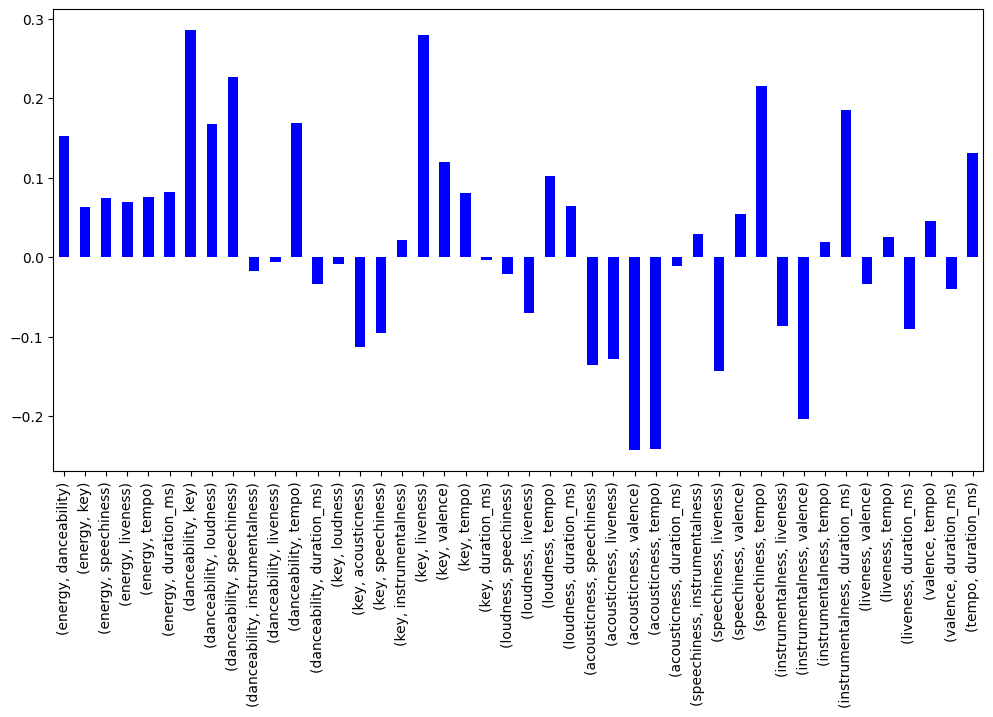

In [235]:
# Data projection of weakly correlated features
weakly_corr_features.plot(kind="bar", figsize=(12, 6), color="blue")

### Comparing Danceability, Loudness, and Acousticness Between Genres

To compare how different genres sound there is a necessity to survey:
1. **Danceability** – How well a song is suited for dancing.
2. **Loudness** – The overall volume level of the track.
3. **Acousticness** – How "acoustic" or instrumental-based the song is.

By comparing these features across **Pop, Hip-Hop, Dance/Electronic, and Alternative/Indie** genres it will become more evident if certain genres have distinct characteristics.


In [236]:
# Create 3 dataframes for danceability, loudness, acoustiness parameters.
danceability_score = pd.DataFrame()
loudness_score = pd.DataFrame()
acousticness_score = pd.DataFrame()

# Select specific genres
selected_genres = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]
filtered_tracks = tracks[tracks["genre"].isin(selected_genres)]


# Calculate mean(), median(), max(), min() figures.
def score_statistics(feature):
    stats = filtered_tracks.groupby(["genre"])[feature].agg(
        ["mean", "median", "max", "min"]
    )
    stats = stats.round(2)
    return stats

In [237]:
# Danceability score across genres
danceability_score = score_statistics("danceability")
danceability_score

mean  median   max   min
genre                                      
Alternative/Indie  0.66    0.66  0.86  0.46
Dance/Electronic   0.76    0.78  0.88  0.65
Hip-Hop/Rap        0.77    0.77  0.90  0.60
Pop                0.68    0.69  0.81  0.46

<Axes: xlabel='genre'>

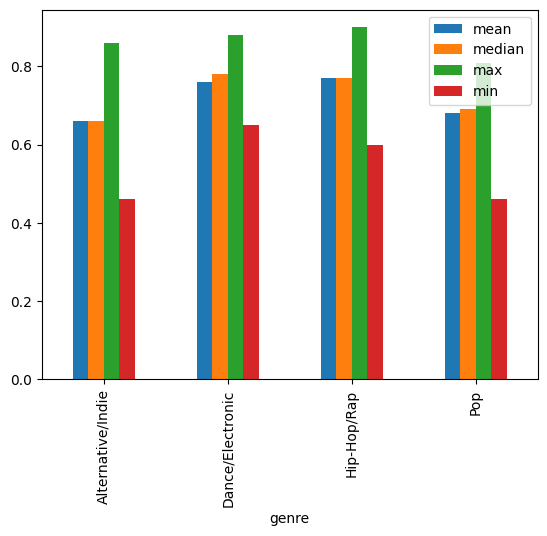

In [238]:
# Data projection of danceability score across Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie
danceability_score.plot.bar()

In [239]:
# Loudness score across genres: Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie
loudness_score = score_statistics("loudness")
loudness_score

mean  median   max    min
genre                                       
Alternative/Indie -5.42   -5.27 -4.75  -6.40
Dance/Electronic  -5.34   -5.46 -3.76  -7.57
Hip-Hop/Rap       -6.92   -7.65 -3.37  -8.82
Pop               -6.46   -6.64 -3.28 -14.45

<Axes: xlabel='genre'>

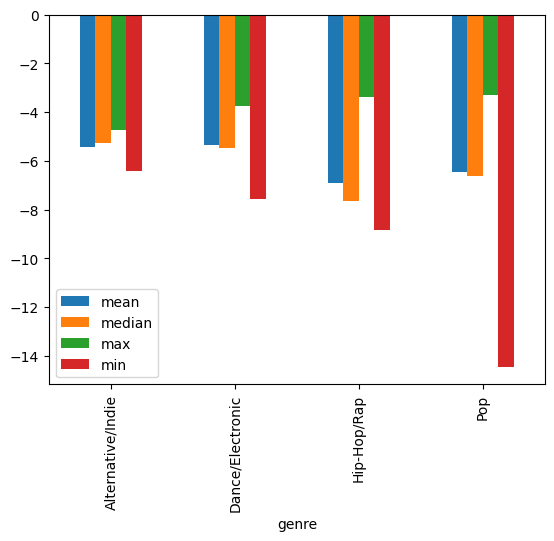

In [240]:
# Rendering of loudness score across Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie
loudness_score.plot.bar()

In [241]:
# Acoustiness score across genres: Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie
acousticness_score = score_statistics("acousticness")
acousticness_score

mean  median   max   min
genre                                      
Alternative/Indie  0.58    0.65  0.75  0.29
Dance/Electronic   0.10    0.07  0.22  0.01
Hip-Hop/Rap        0.19    0.14  0.73  0.01
Pop                0.32    0.26  0.90  0.02

<Axes: xlabel='genre'>

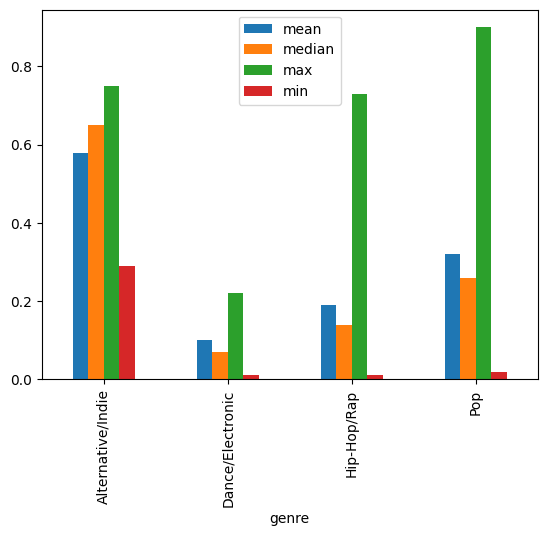

In [242]:
# Simulation of acousticness score across Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie
acousticness_score.plot.bar()

In [243]:
# Danceability score evaluation between genres
danceability_score.describe().round(2)

mean  median   max   min
count  4.00    4.00  4.00  4.00
mean   0.72    0.72  0.86  0.54
std    0.06    0.06  0.04  0.10
min    0.66    0.66  0.81  0.46
25%    0.68    0.68  0.85  0.46
50%    0.72    0.73  0.87  0.53
75%    0.76    0.77  0.88  0.61
max    0.77    0.78  0.90  0.65

In [244]:
# Loudness score estimation between genres
loudness_score.describe().round(2)

mean  median   max    min
count  4.00    4.00  4.00   4.00
mean  -6.04   -6.26 -3.79  -9.31
std    0.78    1.11  0.67   3.57
min   -6.92   -7.65 -4.75 -14.45
25%   -6.58   -6.89 -4.01 -10.23
50%   -5.94   -6.05 -3.56  -8.20
75%   -5.40   -5.41 -3.35  -7.28
max   -5.34   -5.27 -3.28  -6.40

In [245]:
# Acousticness score inspection between genres
acousticness_score.describe().round(2)

mean  median   max   min
count  4.00    4.00  4.00  4.00
mean   0.30    0.28  0.65  0.08
std    0.21    0.26  0.30  0.14
min    0.10    0.07  0.22  0.01
25%    0.17    0.12  0.60  0.01
50%    0.26    0.20  0.74  0.02
75%    0.38    0.36  0.79  0.09
max    0.58    0.65  0.90  0.29

### Final Analysis & Insights

This project analyzes the Spotify Top 50 Tracks of 2020, exploring key trends among popular songs. The dataset consists of 50 most streamed tracks with various features such as artist, track name, genre, danceability, loudness, acousticness, and more. Among these, genre, artist, and album are categorical features, while others like danceability, loudness, and duration_ms are numerical.

Key Findings:
* There are three the most popular artists in the dataset who had multiple songs in the Top 50, indicating their strong mainstream presence.
* Some albums had more than one hit song, suggesting that certain albums dominated the charts.
* The most popular genre was Pop meanwhile some genres appeared only once in the dataset.
* Danceability analysis showed that genres like Hip-Hop/Rap and Dance/Electronic had the highest average danceability scores, while Alternative/Indie had the lowest.
* Loudness analysis revealed that Hip-Hop/Rap and Pop songs were the loudest, while Alternative/Indie songs were quieter and more acoustic.
* Acousticness analysis showed that acoustic tracks were more common in Alternative/Indie, while Hip-Hop/Rap and Dance/Electronic tracks had the lowest acousticness.
* The longest track in the dataset was SICKO MODE by Travis Scott, while the shortest track was Mood (feat. iann dior) by 24kGoldn, with most songs falling within the 2-6 minute range.
* Correlation analysis found strong positive relationships between energy & loudness and while no strong negative correlation was found.

#### Possible improvements:
**To enhance this analysis, future studies could**:

1. Expand the dataset to include the Top 100 or Top 200 songs for a broader perspective.
2. Compare multiple years (e.g., 2019 vs. 2020 vs. 2021) to identify trends over time.
3. Include more features, such as popularity scores, streaming counts, or sentiment analysis of lyrics.
4. Perform a deeper genre analysis by breaking genres into subcategories (e.g., Trap vs. Boom Bap in Hip-Hop).